In [2]:



import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

nba_df= pd.read_csv("Resources/Final_nba_df.csv") 


In [3]:
with pd.option_context('display.max_columns', None):
    display(nba_df.head())

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,69,2229,1,9
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,14,2174,0,14
2,21400899,W,24,3,1,0:00,0.0,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,0,2160,0,0
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,707,2147,11,47
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,634,2074,10,34


In [4]:
close_games= nba_df.loc[nba_df['FINAL_MARGIN'].abs() <= 3]
clutch= close_games.loc[(close_games['MINUTES'] == 0) & (close_games['SECONDS'] <= 24)]
clutch

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
54,21400768,L,-1,14,4,0:01,1.0,34.4,3,missed,...,201588,3.6,0,0,brian roberts,203148,1,1,0,1
299,21400195,L,-1,2,1,0:00,0.0,23.9,3,missed,...,203894,3.6,0,0,brian roberts,203148,0,2160,0,0
310,21400160,L,-2,3,1,0:04,4.0,24.8,3,made,...,201155,4.2,1,3,brian roberts,203148,4,2164,0,4
349,21400071,W,3,1,1,0:02,2.0,22.1,2,missed,...,203118,3.8,0,0,brian roberts,203148,2,2162,0,2
623,21400768,L,-1,9,2,0:02,2.0,8.2,2,missed,...,201588,2.5,0,0,al jefferson,2744,2,1442,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127831,21400432,W,2,4,1,0:03,3.0,25.0,3,made,...,201148,5.4,1,3,jarrett jack,101127,3,2163,0,3
127928,21400266,W,2,1,1,0:21,14.0,6.9,2,made,...,2225,3.9,1,2,jarrett jack,101127,21,2181,0,21
127933,21400266,W,2,6,3,0:00,0.0,32.1,3,missed,...,201158,4.4,0,0,jarrett jack,101127,0,720,0,0
127980,21400178,W,2,8,2,0:24,21.1,0.9,2,made,...,203460,1.3,1,2,jarrett jack,101127,24,1464,0,24


In [7]:

new_clutch= clutch.groupby("PLAYER_NAME")
made_shots2=new_clutch["FGM"].sum()
shot_count2= new_clutch["PLAYER_ID"].count()
clutch_chart= pd.DataFrame({"Shot Count": shot_count2,
                           "Made Shots": made_shots2})
clutch_chart["Success Rate"]= made_shots2/shot_count2
clutch_chart=clutch_chart.sort_values(["Success Rate", 'Made Shots'], ascending= False)
most_attempts= clutch_chart["Shot Count"].max()
clutch_chart["Wins"]= new_clutch.count(["W"] == 'W')
clutch_chart["Losses"]= new_clutch.count(["W"] == 'L')
weighted_made_shots= clutch_chart["Made Shots"]*0.5
weighted_success_rate= clutch_chart["Success Rate"]*0.5
clutch_chart["Weighted Rank"]= (weighted_made_shots+weighted_success_rate)/2
clutch_chart.sort_values("Weighted Rank", ascending=False).head(10)


TypeError: count() takes 1 positional argument but 2 were given

In [5]:
three_pts= clutch.loc[clutch["PTS_TYPE"] == 3]
new_three= three_pts.groupby("PLAYER_NAME")
made_threes= new_three["FGM"].sum()
three_count= new_three["PLAYER_ID"].count()
three_chart= pd.DataFrame({"3s Count": three_count,
                          "Made 3s": made_threes})
three_chart["Missed 3s"]= three_count- made_threes
three_chart["Success Rate"]= three_chart["Made 3s"]/three_chart["3s Count"]
weighted_made_threes= made_threes*0.5
weighted_success_rate3= three_chart["Success Rate"]*0.5
three_chart["Weighted Rank"]= (weighted_made_threes+weighted_success_rate3)/2
three_chart.sort_values("Weighted Rank", ascending= False).head(10)
#158 players

,3s Count,Made 3s,Missed 3s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
james harden,4,3,1,0.750000,0.937500
danny green,4,3,1,0.750000,0.937500
nick young,6,3,3,0.500000,0.875000
tyreke evans,7,3,4,0.428571,0.857143
trey burke,8,3,5,0.375000,0.843750
kyrie irving,2,2,0,1.000000,0.750000
kyle korver,2,2,0,1.000000,0.750000
stephen curry,3,2,1,0.666667,0.666667
evan turner,3,2,1,0.666667,0.666667


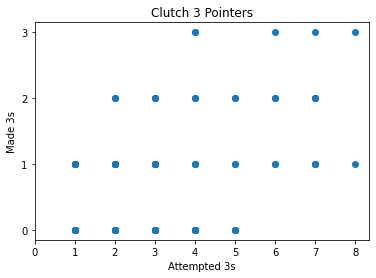

In [6]:
plt.scatter(three_count,made_threes)
plt.xlabel("Attempted 3s")
plt.xticks(np.arange(0, 9, step=1))
plt.yticks(np.arange(0, 4, step=1))
plt.title("Clutch 3 Pointers")
plt.ylabel("Made 3s")
plt.show()

In [13]:
two_pts= clutch.loc[clutch["PTS_TYPE"] == 2]
new_two= two_pts.groupby("PLAYER_NAME")
made_two= new_two["FGM"].sum()
two_count= new_two["PLAYER_ID"].count()
two_chart= pd.DataFrame({"2s Count": two_count,
                          "Made 2s": made_two})
two_chart["Missed 2s"]= two_count- made_two
two_chart["Success Rate"]= two_chart["Made 2s"]/two_chart["2s Count"]
weighted_made_two= made_two*0.5
weighted_success_rate2= two_chart["Success Rate"]*0.5
two_chart["Weighted Rank"]= (weighted_made_two+weighted_success_rate2)/2
two_chart.sort_values("Weighted Rank", ascending= False).head(10)
#207 players

,2s Count,Made 2s,Missed 2s,Success Rate,Weighted Rank
PLAYER_NAME,,,,,
brandon knight,11,8,3,0.727273,2.181818
jarrett jack,9,7,2,0.777778,1.944444
lou williams,6,6,0,1.000000,1.750000
manu ginobili,11,6,5,0.545455,1.636364
tim duncan,11,6,5,0.545455,1.636364
nikola vucevic,6,5,1,0.833333,1.458333
james harden,7,5,2,0.714286,1.428571
john wall,9,5,4,0.555556,1.388889
chris paul,10,5,5,0.500000,1.375000


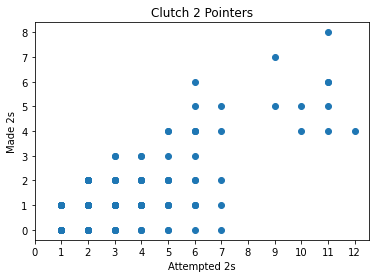

In [8]:
plt.scatter(two_count, made_two)
plt.xlabel("Attempted 2s")
plt.xticks(np.arange(0, 13, step=1))
plt.ylabel("Made 2s")
plt.title("Clutch 2 Pointers")
plt.show()